**Problem**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home.

Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.

Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money

**OBJECTIVE**

to build a sale price prediction model that will aid the customers to find a fair price for their homes

to help the sellers understand what factors are fetching more money for the houses

**PROCESS FLOW**
Now that we know what we have to do, this is how I have planned to process the data to build the models.

**Data Cleaning**

Enhanced Data ANalysis

Modeling

**DATA CLEANING**
In this segment we read the data from the CSV file and convert it into a pandas dataframe.

Then we understand each column in the given data set along with cleaning wherever necessary.

*Things that I will be looking for cleaning are as follows:*

Null Values

Data type

Spelling mistakes

Occurrence of outliers

Duplicated

Construction Of Features if needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train-chennai-sale.csv')

In [4]:
df.shape

(7109, 22)

In [5]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


**Deleting unwanted features from the dataset**

In [6]:
df=df.drop(columns=['PRT_ID','REG_FEE','COMMIS'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [8]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

**Data Cleaning for all the features**

*Area Name checking and Replacing with the correct spelling*




In [10]:
df.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [13]:
df.AREA.replace('Karapakam', 'Karapakkam', inplace=True)
df.AREA.replace('Ann Nagar', 'Anna Nagar', inplace=True)
df.AREA.replace('Adyr', 'Adyar', inplace=True)
df.AREA.replace('Velchery', 'Velachery', inplace=True)
df.AREA.replace('Chrompt', 'Chrompet', inplace=True)
df.AREA.replace('Chrmpet', 'Chrompet', inplace=True)
df.AREA.replace('KKNagar', 'KK Nagar', inplace=True)
df.AREA.replace('TNagar', 'T Nagar', inplace=True)
df.AREA.replace('Chormpet', 'Chrompet', inplace=True)
df.AREA.replace('Ana Nagar', 'Anna Nagar', inplace=True)

*Checking the area Names*

In [14]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Checking Null Values in Area

In [15]:
df.AREA.isnull().sum()

0

**INT SQRT**

In [17]:
df.INT_SQFT.isnull().sum()

0

In [18]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [19]:
df.DATE_SALE.values[0]

'04-05-2011'

In [20]:
df.DATE_SALE.isnull().sum()

0

In [21]:
df.DATE_BUILD.isnull().sum()

0

**Building age**

In [22]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [23]:
df.DATE_BUILD = df.DATE_BUILD.dt.year
df.DATE_SALE = df.DATE_SALE.dt.year

*creating a new feature 'AGE'*

In [24]:
df["AGE"]=df.DATE_SALE-df.DATE_BUILD

In [25]:
df = df.drop(columns = ['DATE_BUILD','DATE_SALE'])

In [26]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


*Distance from Main Road*

In [28]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [29]:
df.DIST_MAINROAD.isnull().sum()

0

In [30]:
df.N_BEDROOM.isnull().sum()

1

In [31]:
df['N_BEDROOM'] = df.N_BEDROOM.fillna(df['N_BEDROOM'].mode()[0])

In [32]:
df.N_BATHROOM.isnull().sum()

5

In [33]:
df['N_BATHROOM'] = df.N_BATHROOM.fillna(df['N_BATHROOM'].mode()[0])

In [34]:
df.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

In [36]:
df.N_ROOM.isnull().sum()

0

In [37]:
df.N_ROOM = df.N_ROOM.astype('int64')

In [39]:
df.N_ROOM.describe()


count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [41]:
df.SALE_COND.isnull().sum()

0

In [42]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [43]:
df.SALE_COND.replace('AbNormal', 'Abnormal', inplace=True)
df.SALE_COND.replace('Ab Normal', 'Abnormal', inplace=True)
df.SALE_COND.replace('AdjLand', 'Adj Land', inplace=True)
df.SALE_COND.replace('Partiall', 'Partial', inplace=True)
df.SALE_COND.replace('PartiaLl', 'Partial', inplace=True)

In [44]:
df.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [45]:
df.PARK_FACIL.isnull().sum()

0

In [46]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [47]:
df.PARK_FACIL.replace('Noo', 'No', inplace=True)

In [48]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df.BUILDTYPE.isnull().sum()

0

In [50]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [51]:
df.BUILDTYPE.replace('Others', 'Other', inplace=True)
df.BUILDTYPE.replace('Comercial', 'Commercial', inplace=True)

In [52]:
df.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [53]:
df.UTILITY_AVAIL.isnull().sum()

0

In [54]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [55]:
df.UTILITY_AVAIL.replace('AllPub', 'All Pub', inplace=True)

In [56]:
df.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [57]:
df.STREET.isnull().sum()

0

In [58]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [59]:
df.STREET.replace('Pavd', 'Paved', inplace=True)
df.STREET.replace('NoAccess ', 'No Access', inplace=True)

In [60]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'NoAccess'], dtype=object)

In [61]:
df.STREET.replace('NoAccess', 'No Access', inplace=True)

In [62]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [63]:
df.MZZONE.isnull().sum()

0

In [64]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [65]:
df.SALES_PRICE.isnull().sum()

0

In [66]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [67]:
df.QS_BATHROOM.isnull().sum()

0

In [74]:
df.QS_BEDROOM.isnull().sum()

0

In [73]:
df.QS_ROOMS.isnull().sum()

0

In [75]:
df.QS_OVERALL.isnull().sum()

48

In [78]:
df.QS_OVERALL.fillna(int(df['QS_OVERALL'].mean()), inplace=True)

In [79]:
df.QS_OVERALL.isnull().sum()

0

**Droping Duplicates**

In [80]:
df.drop_duplicates(keep='first', inplace=True)

After iteration through each column and construction of new features, our data set is now clean for further processing.

**after cleaning the dataset it look like as follows:


In [82]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
5,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750,5
6,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,All Pub,No Access,RL,3.6,2.1,2.5,2.670,8488790,28
7,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,All Pub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,10
8,Chrompet,771,175,1.0,1.0,2,Adj Land,No,Other,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970,34
9,Velachery,1635,74,2.0,1.0,4,Abnormal,No,Other,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650,15


In [84]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

((7109, 18), None)

Data Visalization

Visualization is done to perform enhanced data analysis through which we can understand the relevance between the features and the target variables, which helps us to decide if a feature is important to construct the model.

@ first , I am grouping the numerical and categorical data's from the dataset separately.

Then, using sns.regplot, plotting the relation between the numerical features with the sales price.

And using sns.barplt, plotting the relation between the categorical features with sales price.

Depending upon the nature of the categorical data encoding is performed and the irrelavent data to the target have been drouped.

Numarical and Catagorical Data Split

In [86]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'AGE']

In [88]:
catagorical_features=[feature for feature in df.columns if df[feature].dtypes == 'O']
catagorical_features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

**Exploratory data analysis of Numerical Features**

Sales price is my target Value

In [89]:
target = df.SALES_PRICE

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

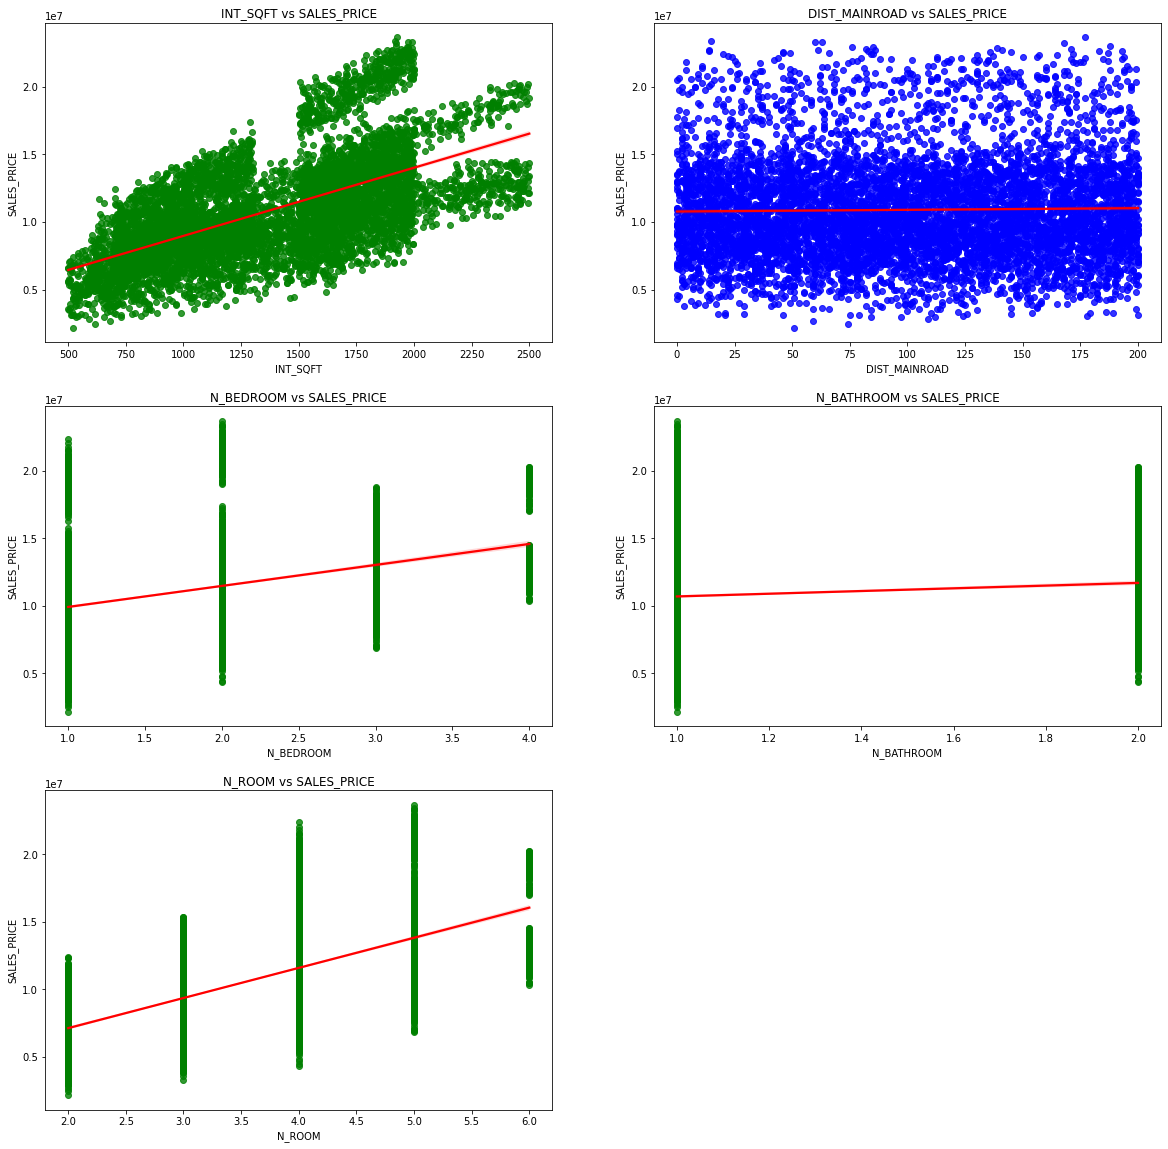

In [91]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=df.INT_SQFT,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('INT_SQFT vs SALES_PRICE')
plt.subplot(322)
sns.regplot(x=df.DIST_MAINROAD,y=target,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.subplot(323)
sns.regplot(x=df.N_BEDROOM,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('N_BEDROOM vs SALES_PRICE')
plt.subplot(324)
sns.regplot(x=df.N_BATHROOM,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('N_BATHROOM vs SALES_PRICE')
plt.subplot(325)
sns.regplot(x=df.N_ROOM,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('N_ROOM vs SALES_PRICE')

Text(0.5, 1.0, 'AGE vs SALES_PRICE')

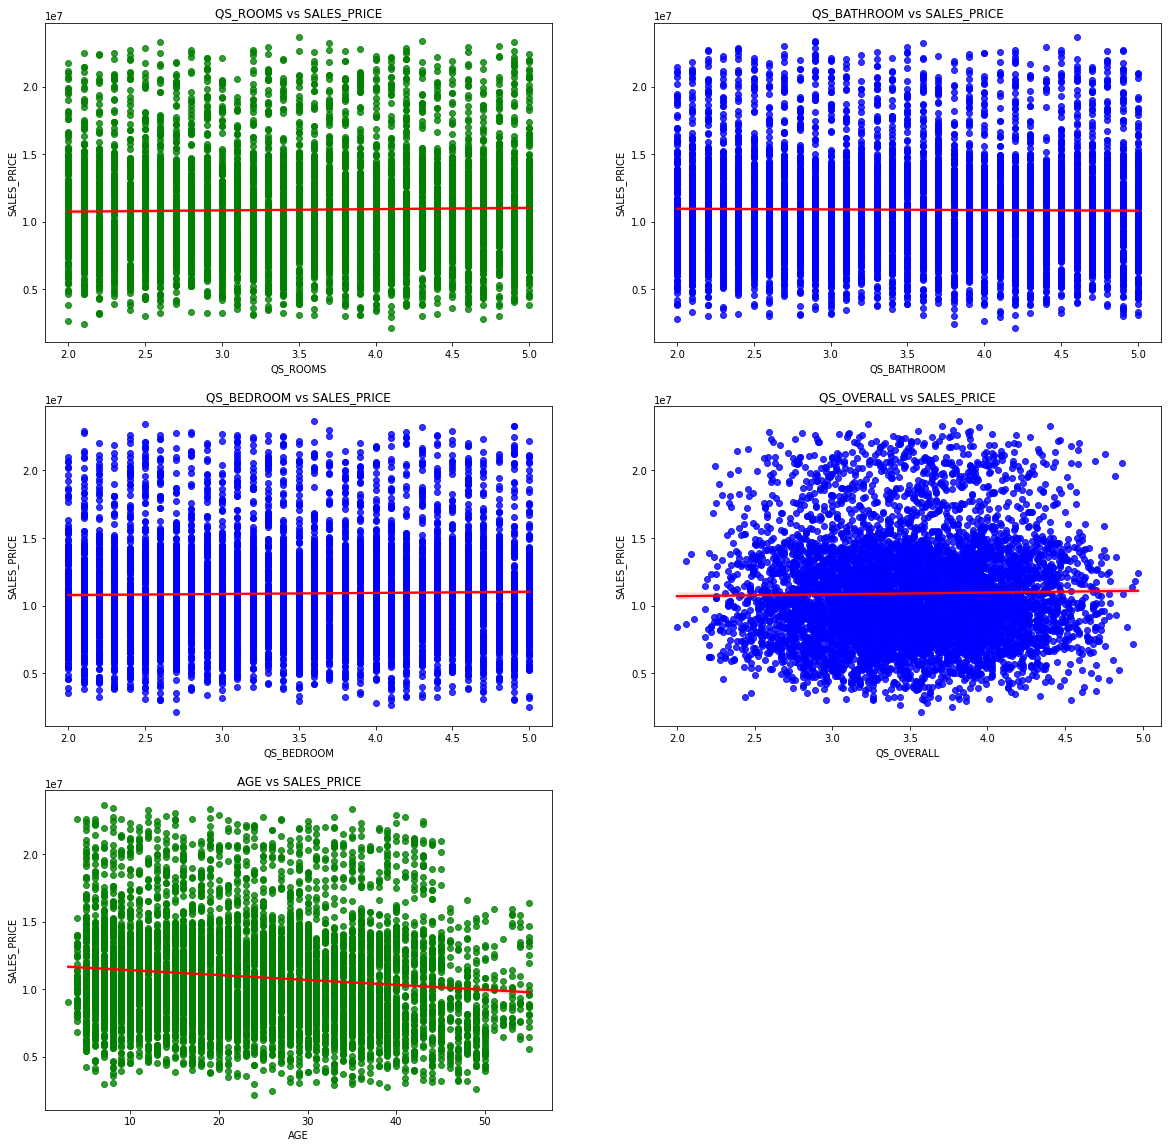

In [92]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=df.QS_ROOMS,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('QS_ROOMS vs SALES_PRICE')
plt.subplot(322)
sns.regplot(x=df.QS_BATHROOM,y=target,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('QS_BATHROOM vs SALES_PRICE')
plt.subplot(323)
sns.regplot(x=df.QS_BEDROOM,y=target,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('QS_BEDROOM vs SALES_PRICE')
plt.subplot(324)
sns.regplot(x=df.QS_OVERALL,y=target,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('QS_OVERALL vs SALES_PRICE')
plt.subplot(325)
sns.regplot(x=df.AGE,y=target,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('AGE vs SALES_PRICE')

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

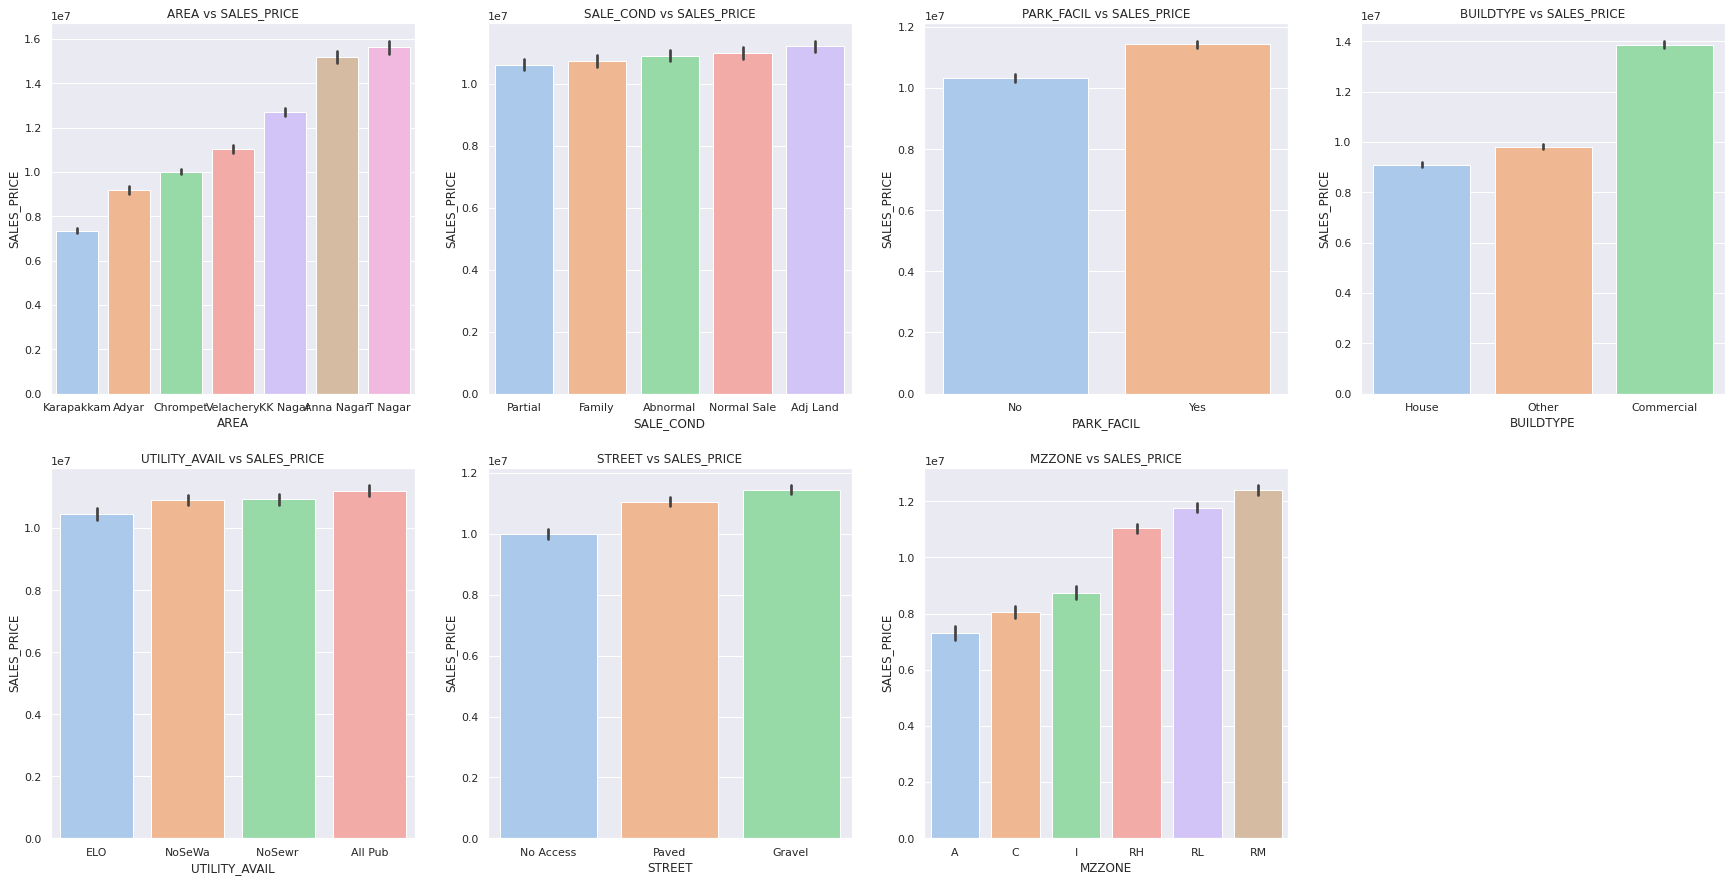

In [93]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')
plt.subplot(242)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')
plt.subplot(243)
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')
plt.subplot(244)
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')
plt.subplot(245)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(246)
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')
plt.subplot(247)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

From the above plots we infer the following:

1) AREA: shows an linear relationship and hence lable encoding is done

In [94]:
df.AREA= df.AREA.map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [95]:
df.SALE_COND= df.SALE_COND.map({'Partial':1,'Family': 2,'Abnormal' :3,'Normal Sale' :4,'Adj Land':5})

In [96]:
df.PARK_FACIL= df.PARK_FACIL.map({'No':1,'Yes': 2})

In [97]:
one_hot = pd.get_dummies(df.BUILDTYPE).astype(int)
df = df.join(one_hot)

In [98]:
df.UTILITY_AVAIL= df.UTILITY_AVAIL.map({'ELO':1,'NoSeWa': 2,'NoSewr ':3,'All Pub' :4})

In [99]:
df.STREET= df.STREET.map({'No Access':1,'Paved': 2,'Gravel' :3})

In [100]:
df.MZZONE= df.MZZONE.map({'A':1,'C': 2,'I' :3,'RH':5,'RL': 6, 'RM':7})

Droping the unwanted features.

In [101]:
df = df.drop(columns = ['BUILDTYPE','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','DIST_MAINROAD','N_BATHROOM'])

Thus the final data filtered for modeling is as follows:

In [103]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1.0,3,3,2,4,2,1,7600000,44,1,0,0
1,6,1986,2.0,5,3,1,4,3,5,21717770,11,1,0,0
2,2,909,1.0,3,3,2,1,3,6,13159200,20,1,0,0
3,4,1855,3.0,5,2,1,3,2,3,9630290,22,0,0,1
4,1,1226,1.0,3,3,2,4,3,2,7406250,30,0,0,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   float64
 3   N_ROOM         7109 non-null   int64  
 4   SALE_COND      7109 non-null   int64  
 5   PARK_FACIL     7109 non-null   int64  
 6   UTILITY_AVAIL  7109 non-null   int64  
 7   STREET         7109 non-null   int64  
 8   MZZONE         7109 non-null   int64  
 9   SALES_PRICE    7109 non-null   int64  
 10  AGE            7109 non-null   int64  
 11  Commercial     7109 non-null   int64  
 12  House          7109 non-null   int64  
 13  Other          7109 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.1 MB


**MODELING**
First step after enhanced data analysis is to segregate the features and target variables.

Once the features and the target are set the following steps are followed:

Train Test Split

Scaling Data



Setting Of Feature and Target Vriables

In [105]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE','AGE', 'Commercial','House', 'Other']]
y = df['SALES_PRICE']

Spliting data

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))

**Models**

I am going to use the following models to predict:

LR

KNN

DT

Random forest

XG Booster



LR Model


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.9248257280521286

In [110]:
y_pred = regressor.predict(X_test)
y_pred

array([14155279.56585282, 13418984.56526105, 18452989.94502123, ...,
       13768539.31955463, 15852206.82471432,  8102915.56880646])

In [111]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3913,13376150,1.415528e+07
2726,12857440,1.341898e+07
6220,19124310,1.845299e+07
2716,4905000,4.294423e+06
5459,13534450,1.321026e+07
...,...,...
3524,9987005,9.981028e+06
3010,5821000,6.286144e+06
66,13364730,1.376854e+07
1642,17115030,1.585221e+07


**Evalution Score (R2):**

In [113]:
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.9248257280521286


KNN-REGRESSION

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k =5, 0.9365004288125102
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9223112373060994
K value  : 2 Cross Value Accuracy : 0.9414323644391551
K value  : 3 Cross Value Accuracy : 0.9458973127781796
K value  : 4 Cross Value Accuracy : 0.947130404297232
K value  : 5 Cross Value Accuracy : 0.9474804716856982
K value  : 6 Cross Value Accuracy : 0.9472275588635408
K value  : 7 Cross Value Accuracy : 0.9460343898088432
K value  : 8 Cross Value Accuracy : 0.9447864611854927
K value  : 9 Cross Value Accuracy : 0.9434354815872646
K value  : 10 Cross Value Accuracy : 0.941847940117962
K value  : 20 Cross Value Accuracy : 0.930279430214284
K value  : 30 Cross Value Accuracy : 0.9211874764921196
K value  : 40 Cross Value Accuracy : 0.9129451243687011
K value  : 50 Cross Value Accuracy : 0.9068318876236077


**Evalution Score (R2):**

In [116]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9248257280521286


DT Model

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [118]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.3549736023125779 Cross Val Score: 0.3588875752516194
K: 2 R2 Score: 0.7003834039205055 Cross Val Score: 0.6819059001742293
K: 3 R2 Score: 0.8008214951832524 Cross Val Score: 0.8016324100218641
K: 4 R2 Score: 0.8807799567746913 Cross Val Score: 0.8819859315127905
K: 5 R2 Score: 0.9146638411022208 Cross Val Score: 0.9151939950985589
K: 6 R2 Score: 0.9370783882679491 Cross Val Score: 0.9358665043374771
K: 7 R2 Score: 0.9481395134303794 Cross Val Score: 0.950564959704882
K: 8 R2 Score: 0.9600190520535958 Cross Val Score: 0.962085967848426
K: 9 R2 Score: 0.9667954482935011 Cross Val Score: 0.9690359112956528
K: 10 R2 Score: 0.9700989761112044 Cross Val Score: 0.972992789211885
K: 20 R2 Score: 0.9740198460076568 Cross Val Score: 0.9757606681894684
K: 40 R2 Score: 0.9751408294945851 Cross Val Score: 0.9758200320849063
K: 60 R2 Score: 0.9744970793605986 Cross Val Score: 0.975623568381079
K: 70 R2 Score: 0.9746848813893576 Cross Val Score: 0.9759277786897991
K: 100 R2 Score: 0.

**Evalution Score (R2):**

In [119]:
y_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test,y_pred)

rmse_dt = mse_dt ** (1/2)

print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set RMSE of dt: 593997.20
Test set R2 of dt: 0.97


RANDOM FOREST

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)

**Evalution Score (R2):**

In [121]:
errors = abs(predictions - y_test)
print('MAE :', round(np.mean(errors), 2), 'degrees.')
print('R2Score :',metrics.r2_score(y_test,y_pred))

MAE : 1301741.4 degrees.
R2Score : 0.9740127592100917


XG Boosting

In [122]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [124]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train)))

Learning rate :  0.01  Train score :  -0.40411510282864693  Cross-Val score :  -0.38131030241954267
Learning rate :  0.02  Train score :  0.7463416238989984  Cross-Val score :  0.7433767229761639
Learning rate :  0.03  Train score :  0.9270067255166086  Cross-Val score :  0.922286978876188
Learning rate :  0.04  Train score :  0.9637855343131054  Cross-Val score :  0.9600299081809531
Learning rate :  0.05  Train score :  0.9755811026150208  Cross-Val score :  0.9726335612631398
Learning rate :  0.1  Train score :  0.9926494629263161  Cross-Val score :  0.9909121403183132
Learning rate :  0.11  Train score :  0.9935622861199294  Cross-Val score :  0.9920811966517027
Learning rate :  0.12  Train score :  0.9938328298903718  Cross-Val score :  0.9931862426797429
Learning rate :  0.13  Train score :  0.9944505605280141  Cross-Val score :  0.9936702699115871
Learning rate :  0.14  Train score :  0.9953570835333727  Cross-Val score :  0.9942806694675316
Learning rate :  0.15  Train score :  

In [125]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared
y_pred = model.predict(X_test)

**Evalution Score (R2):**

In [126]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9977299740052276


**Summary**


successfully constructed all the models and the outcomes from the evaluation are as follows:

Linear Regression with R2_Score: 0.9248257280521286

KNN Regression with R2_Score: 0.9248257280521286

Decision Tree Regression with R2_Score: 0.97

Random Forest with R2_Score: 0.9746931257147039

XG Boost with R2_Score: 0.9977299740052276


comparing all the models the best evaluation models is ***XG BOOST***

**FEATURE IMPORTANCE**

In [127]:

importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Commercial           Importance: 0.4699999988079071
Variable: AREA                 Importance: 0.3400000035762787
Variable: PARK_FACIL           Importance: 0.05000000074505806
Variable: INT_SQFT             Importance: 0.029999999329447746
Variable: MZZONE               Importance: 0.029999999329447746
Variable: STREET               Importance: 0.019999999552965164
Variable: House                Importance: 0.019999999552965164
Variable: N_BEDROOM            Importance: 0.009999999776482582
Variable: N_ROOM               Importance: 0.009999999776482582
Variable: SALE_COND            Importance: 0.009999999776482582
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: AGE                  Importance: 0.0
Variable: Other                Importance: 0.0


**CONCLUSION**

After doing an in depth data cleaning and enhanced data analysis, I am able to construct models with accurate predictions.

Thus I have arrived at the answers to the question stated earlier as follows:

We have sucessfully built the models from wich we have seen that XG BOOST to give the most acurate results for the customers.

Some of the features that can fetch more money for the sellers are

Commercial Buildings

Area of the house

Parking Facilities

Int Sqfeet

MZZone locations